In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Develop procedure for using `climpred` with ESM4 PPE data

In [7]:
import climpred as cp
from processing import *
from information import *
import pandas as pd
import cftime

In [8]:
variable = 'tos'
frequency = 'monthly'

### Regional means

In [74]:
# timestr = '*01'
# filename = '.'.join([variable,frequency,timestr,'regionalmeans','nc'])
# es = xr.open_mfdataset(ppeDict['datasavedir']+'/processed/regionalmeans/'+filename,
#                        preprocess=preprocess_climpred)
# es = es.chunk({'init':-1})

timestr = 'control'
filename = '.'.join([variable,frequency,timestr,'regionalmeans','nc'])
control = xr.open_mfdataset(ppeDict['datasavedir']+'/processed/regionalmeans/'+filename)

In [ ]:
pm = cp.PerfectModelEnsemble(es['global']).add_control(control['global'])

In [66]:
skill = pm.verify(
    metric="acc", comparison="m2e", dim=["init", "member"], reference=["persistence"]
)

/home/graemem/.conda/envs/core/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/graemem/.conda/envs/core/lib/python3.10/site-packages/xskillscore/core/np_deterministic.py:309: RuntimeWarning: invalid value encountered in float_scalars
  r = r_num / r_den


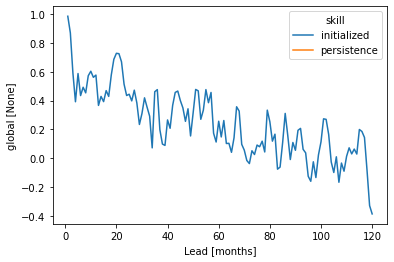

In [57]:
skill['global'].plot(hue='skill')

In [69]:
skill['global'].sel(skill='persistence').values

/home/graemem/.conda/envs/core/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/graemem/.conda/envs/core/lib/python3.10/site-packages/xskillscore/core/np_deterministic.py:309: RuntimeWarning: invalid value encountered in float_scalars
  r = r_num / r_den


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan])

### Global data

In [9]:
control = open_control(variable,frequency)

In [10]:
startyear = ppeDict['startyears'][0]
startmonth = 1

In [11]:
ensemble = open_ensemble(variable,
                         frequency,
                         startyear,
                         startmonth,
                         control=control,
                         verbose=True)

Opening member 1
Opening member 2
Opening member 3
Opening member 4
Opening member 5
Opening member 6
Opening member 7
Opening member 8
Opening member 9
Adding control


In [12]:
init = cftime.DatetimeNoLeap(startyear,startmonth,1)

In [20]:
ensemblenow = ensemble['tos'].copy().sel(xh=-150,yh=0,method='nearest')
controlnow = control['tos'].copy().sel(xh=-150,yh=0,method='nearest').chunk({'time':-1})

In [21]:
ensemblenow = preprocess_climpred(ensemblenow)

In [22]:
ensemblenow

<xarray.DataArray 'tos' (init: 1, member: 10, lead: 120)>
dask.array<rechunk-merge, shape=(1, 10, 120), dtype=float32, chunksize=(1, 10, 120), chunktype=numpy.ndarray>
Coordinates:
  * init     (init) object 0123-01-01 00:00:00
    xh       float64 -149.8
    yh       float64 -0.0
  * lead     (lead) int64 1 2 3 4 5 6 7 8 9 ... 113 114 115 116 117 118 119 120
  * member   (member) int64 0 1 2 3 4 5 6 7 8 9
Attributes:
    long_name:      Sea Surface Temperature
    units:          degC
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature

In [23]:
controlnow

<xarray.DataArray 'tos' (time: 3600)>
dask.array<rechunk-merge, shape=(3600,), dtype=float32, chunksize=(3600,), chunktype=numpy.ndarray>
Coordinates:
    xh       float64 -149.8
    yh       float64 -0.0
  * time     (time) object 0101-01-16 12:00:00 ... 0400-12-16 12:00:00
Attributes:
    long_name:      Sea Surface Temperature
    units:          degC
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature

In [24]:
pm = cp.PerfectModelEnsemble(ensemblenow).add_control(controlnow)

In [33]:
pm

<climpred.PerfectModelEnsemble>
Initialized:
    tos      (init, member, lead) float32 dask.array<chunksize=(1, 10, 120), meta=np.ndarray>
Uninitialized:
    None
Control:
    tos      (time) float32 dask.array<chunksize=(3600,), meta=np.ndarray>

In [36]:
skill = pm.verify(
    metric="acc",
    comparison="m2e",
    reference=["persistence"],
)

/home/graemem/.conda/envs/core/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/graemem/.conda/envs/core/lib/python3.10/site-packages/xskillscore/core/np_deterministic.py:309: RuntimeWarning: invalid value encountered in float_scalars
  r = r_num / r_den


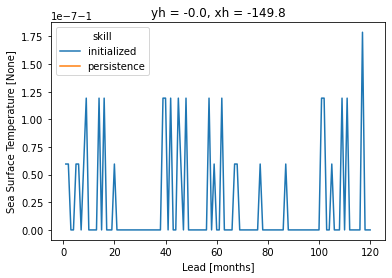

In [37]:
skill['tos'].plot(hue='skill')